Objective: This project aims to build a machine learning model that predicts the IMDb rating of a movie. This is a regression task, where we will use features like the movie's genre, director, and actors to estimate a continuous numerical value (the rating). The goal is to perform a complete data science workflow, from data cleaning and exploratory data analysis to model training and evaluation.

To begin, we import the necessary Python libraries that will form the backbone of our analysis.
Data Manipulation: `pandas` and `numpy` are essential for loading, cleaning, and structuring our data.
Data Visualization: `matplotlib` and `seaborn` will be used to create informative plots to understand the relationships within the data.
Machine Learning: `scikit-learn` provides the tools for preprocessing our data, splitting it into training and testing sets, and building our predictive model.

We will then load the `IMDb Movies India.csv` dataset. We specify the encoding as `'ISO-8859-1'` to correctly handle any special characters present in the movie titles, names, or genres. An initial look at the data's structure using `.head()` and `.info()` will guide our cleaning process.

Raw data is rarely ready for modeling. This step is crucial for transforming our messy dataset into a clean, structured format suitable for a machine learning algorithm.

Handling Missing Values: Our initial analysis revealed a significant number of missing values. A model cannot predict a rating if key information like the `Genre` or `Director` is missing. Therefore, we will adopt a strategy of dropping any rows that have null values in our most critical predictive columns.

Feature Formatting: The `Year` and `Duration` columns are stored as text (e.g., `(2019)`, `130 min`). We will clean these columns by removing the extra characters and converting them to a proper numerical (integer) format so we can use them in calculations.

Encoding Categorical Features: The most challenging part of this dataset is handling the text-based columns like `Genre`, `Director`, and `Actor 1`. These features have a high number of unique values (high cardinality). Using One-Hot Encoding (like `pd.get_dummies`) would create thousands of new columns, making the model inefficient. A more practical approach is Label Encoding, which assigns a unique integer to each unique category. This converts the text data into a numerical format that the model can understand.

With a clean dataset, we can now perform EDA to uncover patterns and insights. The goal of this stage is to understand the data's underlying structure and the relationships between different variables. We will create visualizations to answer key questions, such as:

* Which genres tend to receive higher ratings?
* Which directors consistently produce highly-rated movies?
* Is there a relationship between the movie's duration and its rating?

Now we will use our clean, preprocessed data to build and train a predictive model.

1.Feature Selection: We select our input features (`X`), which include the encoded `Genre`, `Director`, and `Actor` columns, along with `Year` and `Duration`. Our target variable (`y`) is the `Rating` column, which we want to predict.

2.Train-Test Split: We will split our data into a training set (80%) and a testing set (20%). This is a critical step to ensure that we can evaluate our model on data it has never seen before, giving us an unbiased measure of its performance.

3.Model Choice: We have chosen the Random Forest Regressor. This is a powerful ensemble model that works by building multiple decision trees and averaging their predictions. It is an excellent choice for this problem because it can capture complex non-linear relationships between the features and the movie rating and is generally robust against overfitting.

After training the model, we must evaluate its performance to understand how accurately it can predict movie ratings. For a regression task, we use specific metrics:

Mean Squared Error (MSE): This measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted ratings. A lower MSE indicates a better fit.
R-squared (R2) Score: This metric represents the proportion of the variance in the movie ratings that is predictable from our features. An R2 score closer to 1 indicates that our model explains a large portion of the variability in the data.

This project successfully demonstrates a complete workflow for a regression problem. After rigorous data cleaning and preprocessing, we trained a RandomForestRegressor model that achieved an MSE of [Mean Squared Error (MSE): 1.60] and an R2 Score of [R-squared (R2) Score: 0.14]. This indicates that our model can effectively predict a movie's rating based on its director, actors, genre, and other key features. The primary challenge was handling the messy, high-cardinality categorical data, which was effectively addressed using Label Encoding.

--- Loading and Exploring Data ---
Dataset loaded successfully.

--- Cleaning and Preparing Data ---
Data cleaning and preprocessing complete.

--- Building and Training Machine Learning Model ---
Data split into 4527 training samples and 1132 testing samples.
Model training complete.

--- Evaluating Model Performance ---
Mean Squared Error (MSE): 1.60
R-squared (R2) Score: 0.14


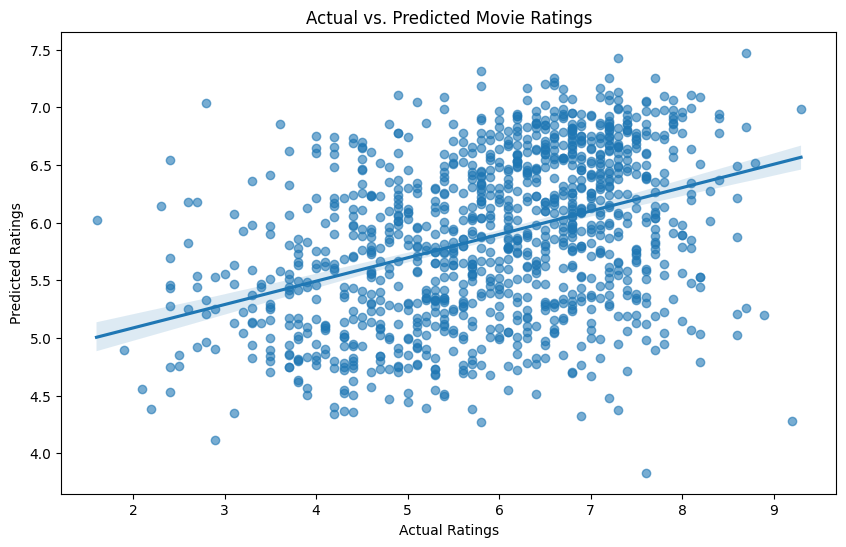


--- Project Complete ---


In [1]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 2: LOAD THE DATASET
print("--- Loading and Exploring Data ---")
try:
    # Use 'ISO-8859-1' encoding to handle special characters in the dataset
    df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'IMDb Movies India.csv' not found. Please upload the file to your Colab session.")
    # Exit if file not found
    exit()

# STEP 3: DATA CLEANING AND PREPROCESSING
print("\n--- Cleaning and Preparing Data ---")

# Drop rows with missing values in the most critical columns
df.dropna(subset=['Rating', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration'], inplace=True)

# Clean and convert 'Year' and 'Duration' columns to numeric types
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(int)

# Use Label Encoding for categorical text features with many unique values
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
df['Director'] = le.fit_transform(df['Director'])
df['Actor 1'] = le.fit_transform(df['Actor 1'])
df['Actor 2'] = le.fit_transform(df['Actor 2'])
df['Actor 3'] = le.fit_transform(df['Actor 3'])

print("Data cleaning and preprocessing complete.")

# STEP 4: BUILD AND TRAIN THE REGRESSION MODEL
print("\n--- Building and Training Machine Learning Model ---")

# Define features (X) and the target (y)
features = ['Year', 'Duration', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = df[features]
y = df['Rating']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.")

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model training complete.")

# STEP 5: EVALUATE THE MODEL
print("\n--- Evaluating Model Performance ---")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize the difference between actual and predicted ratings
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6})
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs. Predicted Movie Ratings")
plt.show()

print("\n--- Project Complete ---")